In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (update the path to your dataset)
data = pd.read_excel(r'C:\Users\surya\OneDrive\Documents\Prediction\Prediction_dataa.xlsx', engine='openpyxl')

# Check if the dataset is loaded properly
print(data.head())

# Drop columns that won't be used for prediction
data = data.drop(['Customer ID', 'Churn Category', 'Churn Reason'], axis=1, errors='ignore')

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'City', 'Offer', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Ensure all columns in columns_to_encode exist in your data
columns_to_encode = [col for col in columns_to_encode if col in data.columns]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
if 'Customer_Status' in data.columns:
    data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
else:
    raise ValueError("Column 'Customer_Status' is not found in the dataset.")

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Check for non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("The following columns are non-numeric and will be encoded:")
    print(non_numeric_columns)
    for column in non_numeric_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

# Check the shape of X and y to ensure they are correctly defined
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the data splitting was successful
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Output success message
print("Model training complete.")


  Customer_ID  Gender  Age Married          City  Number_of_Referrals  \
0  0002-ORFBO  Female   37     Yes  Frazier Park                    2   
1  0003-MKNFE    Male   46      No      Glendale                    0   
2  0004-TLHLJ    Male   50      No    Costa Mesa                    0   
3  0011-IGKFF    Male   78     Yes      Martinez                    1   
4  0013-EXCHZ  Female   75     Yes     Camarillo                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 9       None           Yes             No  ...   
1                 9       None           Yes            Yes  ...   
2                 4    Offer E           Yes             No  ...   
3                13    Offer D           Yes             No  ...   
4                 3       None           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      65.599998    593.299988      0.000000   
1      Credit Card    

Confusion Matrix:
[[935   0]
 [  0 383]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       935
           1       1.00      1.00      1.00       383

    accuracy                           1.00      1318
   macro avg       1.00      1.00      1.00      1318
weighted avg       1.00      1.00      1.00      1318



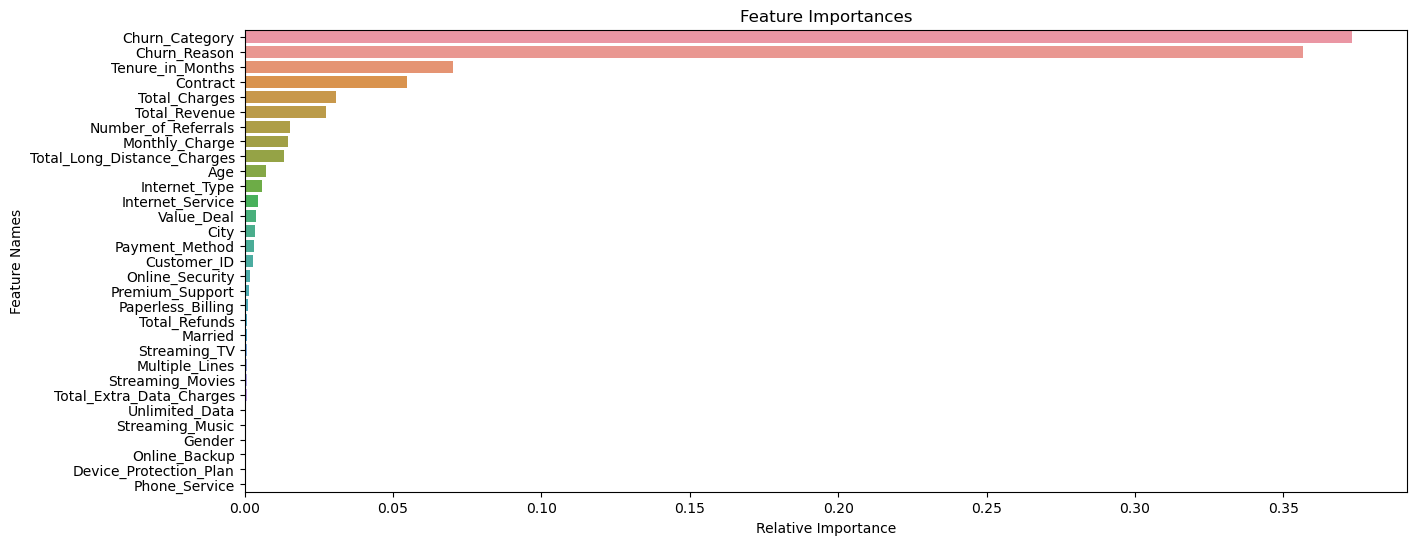

In [15]:
# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the path to the Joiner Data Excel file
file_path = r'C:\Users\surya\OneDrive\Documents\Prediction\Prediction_dataa.xlsx'

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        try:
            # Attempt to transform the column
            new_data[column] = label_encoders[column].transform(new_data[column])
        except ValueError as e:
            # Handle unseen labels
            unseen_labels = set(new_data[column]) - set(label_encoders[column].classes_)
            if unseen_labels:
                # Option 1: Set unseen labels to a default value (e.g., most frequent label)
                most_frequent_label = label_encoders[column].classes_[0]
                new_data[column] = new_data[column].apply(lambda x: most_frequent_label if x in unseen_labels else x)
                new_data[column] = label_encoders[column].transform(new_data[column])
                print(f"Unseen labels in column '{column}' were set to the most frequent label.")
            else:
                raise e

# Retain all columns during prediction
new_data_for_prediction = new_data.drop(['Customer_Status'], axis=1, errors='ignore')

# Make predictions
new_predictions = rf_model.predict(new_data_for_prediction)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
output_path = r'C:\Users\surya\OneDrive\Documents\Prediction\Churned_Customers.xlsx'
original_data.to_excel(output_path, index=False)

print(f"Results saved to {output_path}")


  Customer_ID  Gender  Age Married           City  Number_of_Referrals  \
0  0021-IKXGC  Female   72      No     San Marcos                    0   
1  0030-FNXPP  Female   22      No         Keeler                    0   
2  0082-LDZUE    Male   54      No      Calistoga                    0   
3  0139-IVFJG  Female   19     Yes       Temecula                   10   
4  0178-CIIKR  Female   60      No  Crows Landing                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1    Offer E           Yes            Yes  ...   
1                 3       None           Yes             No  ...   
2                 1    Offer E           Yes             No  ...   
3                 2       None           Yes             No  ...   
4                 3       None           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      72.099998     72.099998           0.0   
1      Credit Ca